**Lecture link:** https://www.scaler.com/meetings/i/dsml-advanced-logistic-regression-2-2/archive

## Content


1.   Today's topics (00:00 - 06:15)
2.   Quick recap of co-ordinate geometry required(06:15 - 21:54)
3.  Code Implementation of sigmoid function(21:54 - 28:51)
4. Log-loss (28:51 - 59:36)
5. Optimization(59:36 - 01:17:14)
6. Big picture (01:17:14 - 1:24:58)
7. Code implementation of logistic regression(1:24:58 - 02:14:12)
8. Dealing with Imbalanced data set(02:04:12 - 02:14:00)



<img src='https://drive.google.com/uc?id=1CsDG5fZSO9Zi-kLQHTbdszjYQ_R8Klv1'>



## Recap

* Let's assume a plane with equation $w^Tx+w_0=0$ and point $xi$ lies on the plane and $w$ be a unit vector from the origin
* The point $x_2$ is at some point, whose distance from plane($π$) is given as
$d_2=dist(𝛱,x2)=w^Tx_i+w_0$ as the point x2 is above the plane the distance is +ve.
* Similarly for $x_3$, but here the distance is considered -ve as it lies below the hyperplane $𝛱$

<img src='https://drive.google.com/uc?id=1CiEnY61_Go__vRg79HLQjt9ZvL-oM7Wa'>




Now, lets see about sigmoid function which we learnt eearlier
* Let us again take a plane $w^Tx+w_0$ and assume $z_i=w^Tx_i+w_0$
* And we know sigmoid $σ(z_i)=\frac{1}{1+e^{-z_i}}$
* For point $x_1$ which lies on the plane $z_1=0$ the sigmoid value is
 * $σ(z_i)=\frac{1}{1+e^{-z_1}}=\frac{1}{1+e^0}= 0.5$
* Let us assume another point $x_2$ on the plane $𝛱1$ which is above the plane $𝛱$
 * value of $z_2$ will be greater than $0$
 * $σ(z_2)>0.5$

* Similarly for point $x_3$ which lies on a plane $𝛱2$, which lies below plane $𝛱$
 * value of $z_3$ will be less than $0$
 * $σ(z_2)<0.5$

<img src='https://drive.google.com/uc?id=1sfPS2UitkC-682-eXlWgn2xPIzZfz_5y'>






<img src='https://drive.google.com/uc?id=1NOfRXC7UZ4WIaEAYlORH8cKU7c_gKelK'>






* When we take two point $x_1,x_2$ on the same side of plane and $x1$ being farther than $x2$ from plane then probability of $x_1$ belonging to class 1 is more than $x_2$

<img src='https://drive.google.com/uc?id=1FgRsOolvYVy4uBHaQrISz_9C8Wp14Hdj'>




## Code implementation of sigmoid function

Now let's see a simple code for sigmoid function

First let's import all the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

After importing let's define sigmoid function

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)


Here the value of $σ(x_i)$ is returned. i.e $\frac{1}{1+e^{-x_i}}$

Now, let's give the values

In [ ]:
x = np.linspace(-10, 10, 20)
z = sigmoid(x)


plotting  the same

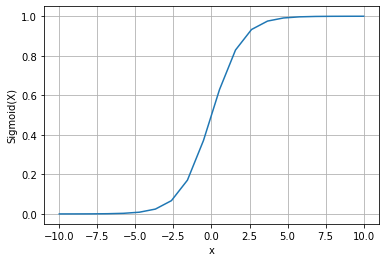

In [ ]:
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

* The output graph is the graph for the sigmoid function between -10 and 10
* In the above graph you can clearly see that as the value incresases the rate of increase in the sigmoid function is getting very low beyond 5
* As the distnace increases, the probability of value getting 1 increases, it increses rapidly till 5 but slows down beyond.
*   Same logic can be explained for the other side also.



<img src='https://drive.google.com/uc?id=1zGdf4smFWRnR-LuAFwZyvcv8MkNG19ga'>




## Log-loss

Context:

 We have points $x,y$ where $x$ is a point in data space, and y lies in the range of 0 and 1
 *  we want a linear seperator in the form $w^Tx+w_0$
 * The distance from the points is $z_i=w^Tx_i+w_0$ can range between $(-∞,+∞)$ but we want map these values in range (0,1) for that we have used the sigmoid function.
 * Now we have actual $y$ values as 0 or 1 but now we have $y_i$hat whixh ranges between 0 and 1
 * So, for comparing this $y$ and $y_i$hat we use **Log-loss**

<img src='https://drive.google.com/uc?id=1ei8v6vmyuuSLX6OXXVzLhKOOUk_PU8rP'>



The Log-loss function is:
*  when $y_i=1$, log loss is equal to $-log(y_i$hat)
* when $y_i=0$, log loss is equal to $-log(1-y_i$hat)

<img src='https://drive.google.com/uc?id=1R_C_cXOpra4Y6Xz0U0IcDrlMrM0M1_6w'>



**Why Log-loss?**

* while deriving logistic regression from probability by using  **maximum** **likelyhood estimation** naturally the function which we are getting is log-loss.
* We can use any other function for calcualting the loss, but that's not logistic regression.

we can use a single formula for addressing both the situation when $y$ is 0 or 1.

The combined equation is
* log-loss= $-y log(y_i$hat) - $(1-y)log(1-y_i$hat)


Now let's a take a look at the code for the log-loss function

In [ ]:
y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


In [ ]:
y = 1
yhat=0.99
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


In [ ]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


In [ ]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


In [ ]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


In [ ]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


In [ ]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))
2.302585092994046

2.302585092994046


2.302585092994046

You can see the value of **log-loss is decreasing** as your **predicted value $y_i$hat is geting closer** **to observed value $y_i$**and **log loss is increasing** as your **predicted value $y_i$hat is geting farther from observed value $y_i$**

## Optimiztion

So, the **optimization problem** for the logistic regression is to **minimize** **the log-loss**
* The mathematical representation goes as follows:
 * $min_{w_j}∑_{i=1}^n$$-y log(y_i$hat) - $(1-y)log(1-y_i$hat)

Now, we have to regularise the same
* For which we will use the regularization term which is $λ∑_jw_j^2$
* This is same as Linear Regression

Now, the optimization function becomes
* $min_{w_j}∑_{i=1}^n$$[-y log(y_i$hat)$ - $$(1-y)log(1-y_i$hat)$+λ∑_jw_j^2]$


<img src='https://drive.google.com/uc?id=1ps7CIjHM1E-4W5RKpARI7rSQu8bE-A91'>



## Big Picture

 Let's see all the steps together
 1. First we needed a linear seperator i.e $w^Tx_i+w_0$
 2. Then squashed the $z_i$ values between 0 and 1
 3. After that we want to compare $y_i and y_i$hat
 4. Then we solved optimization problem and regularised the same
 5. The last one is hyper parameter tuning for over-fitting and under-fitting trade off, where hyper parameter here is $λ$
 6. Then calculate the accuracy of the system

<img src='https://drive.google.com/uc?id=1V59eCP7m-y21_gZ8QY4xsBMvGG8LHXff'>



<img src='https://drive.google.com/uc?id=1J51riAC25oXNe7GHId0_0nGyD1BWB-Ms'>


<img src='https://drive.google.com/uc?id=14GWn2gVIHVmuwg4gMaOv-Nh2wID212ry'>


## Code Implementation

**Churn prediction in telecom**

Let's get in to the code:

Importing libraries

In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

the bwlow hwlps in downloading the csv file into your system by accessing the location address from the google drive

In [ ]:
id = "1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_" -O Churn.csv

--2022-06-14 03:01:21--  https://drive.google.com/uc?export=download&id=1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.139, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsfm1tcp4filermj4bfn68brclmur3se/1655175675000/10804243441129704195/*/1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_?e=download [following]
--2022-06-14 03:01:22--  https://doc-0g-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsfm1tcp4filermj4bfn68brclmur3se/1655175675000/10804243441129704195/*/1Hryt6VSnHklyw3xxBG3nlhymzNAQhG-_?e=download
Resolving doc-0g-ag-docs.googleusercontent.com (doc-0g-ag-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0g-ag-docs.googleusercontent.com (doc-0g-ag-docs.go

In [ ]:
import pandas as pd
churn = pd.read_csv("Churn.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


The above code is used to read the downloaded file

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl Plan       3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

Now, let's get into the required part

In [ ]:
churn["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

From the above output we can see the number of customers got churned in which we are going to work

So, let's do a basic EDA to find which features are effecting the churn

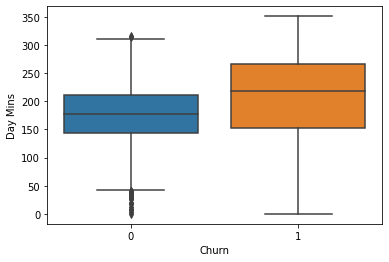

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='Day Mins', data = churn)

In the above we have seen the relation between "Day mins" and "Churn"

Now, let's find for all other features by using pair plot.

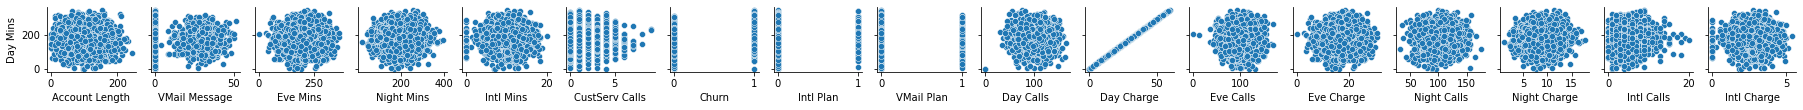

In [ ]:
sns.pairplot(data=churn, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=1.5, aspect=1)
plt.show()

As Day Mins and Day Charge are completely related we can drop one
* we will continue doing the same and select few features which are useful for our problem

Let's continue in preparing our data with new data

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(3333, 5)

We have assigned the selected coulmns to $x$ and the churn to $y$

Now, let's do the train and cross validation for our data

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=42)
X_train.shape

(1999, 5)

As we did in the Linear regression
* we are again deviding the data into 3 sets
* we are assigning 20% of the data to test set
* Then deviding the remaining data, such that 60% of the whole data is given to training set and rest 20% to cross validation set

Now, lets do column standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

All that is left is to create an object of class LogisticRegression and feed our data to the same

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We have imported the LogisticRegression function and trained our object 'model' with the training data set that we split

Now, let's see the weights of each feature and also $w_0$ which is intercept.





In [ ]:
model.coef_

array([[ 0.01171028,  0.00628069,  0.51870002,  1.97741128, -0.03885603]])

Here we can see feature 4 has largest weight i.e "intl plan", as it's a large positive value we can conclude that people having more "intl plan" will probably churn more

In [ ]:
model.intercept_

array([-6.3286969])

Till now haven't done any Hyper parameter tuning

Now, let's start doing proper hyper parameter tuning which is c i.e inverse of the $λ$

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 1000.0, 10):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)


The code is similar to the code explained in Linear Regression


*   First we initialize the values for $λ$
*   Then create a pipeline for scaler and Logistic Regression function
* Then fit the train data to the model
*  A nd get the scores of the train and validation data set



In [ ]:
len(val_scores)

100

Now, let's plot the graph and pick the $λ$ which gives the best validation score

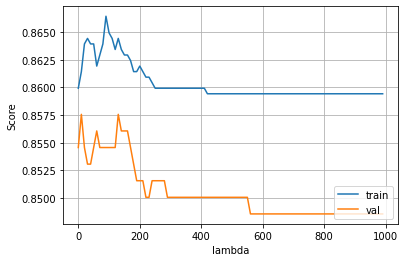

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 1000.0, 10)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 1000.0, 10)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

so, let's see at what value of $λ$ we are getting the maximum validation score

In [ ]:
np.argmax(val_scores)

1

As the output is 1, we can decide that validation score is maximum at $λ=1$

Now, let's see the score for that particular value of $λ$

In [ ]:
val_scores[1]

0.8575712143928036

* Here, we saw as there we are changing the **random state** of the **train_test_split** there is a significant difference in the graphs.
* This mainly points to one problem that is not having the enough data
* Let's now see how to deal with these kinds of **imbalanced data set**.

## Dealing with Imbalanced data set

Let's take the example of churn for dealing this

* Say, we have 850 negative and 150 positive points
* As loss is nothing but  the summation of log-loss of all the points, here **negative points are domiating this summation** as they are extremely more in number.


<img src='https://drive.google.com/uc?id=1MEkrbjOCRi3kQNbea4iULo88sJ_hDEoW'>



**What are the possible ways of dealing with this?**

1. We can **replicate the records** having positive values so that data becomes balanced.
2. The other way is we can **multiply my each log-loss** with a weight
and the weight will be more for +ve values in this case
* loss= $∑_1^n log.loss_i(w_j) $
 * say $w_j=6$ for positives and $w_j=1$ for negatives
* We can do this by using **classweights function**